In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud = pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [13]:
for i in range(len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'] [i]<=30000:
        fraud['Taxable.Income'] [i]= 'risky'
    else:
         fraud['Taxable.Income'] [i] = 'good'
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [14]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


In [17]:
fraud2 = fraud.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
fraud2['Encoded_Undergrad'] = le.fit_transform(fraud2['Undergrad'])
fraud2['Encoded_Marital.Status'] = le.fit_transform(fraud2['Marital.Status'])
fraud2['Encoded_Taxable.Income'] = le.fit_transform(fraud2['Taxable.Income'])
fraud2['Encoded_Urban'] = le.fit_transform(fraud2['Urban'])
fraud2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Encoded_Undergrad,Encoded_Marital.Status,Encoded_Taxable.Income,Encoded_Urban
0,NO,Single,good,50047,10,YES,0,2,0,1
1,YES,Divorced,good,134075,18,YES,1,0,0,1
2,NO,Married,good,160205,30,YES,0,1,0,1
3,YES,Single,good,193264,15,YES,1,2,0,1
4,NO,Married,good,27533,28,NO,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES,1,0,0,1
596,YES,Divorced,good,55369,2,YES,1,0,0,1
597,NO,Divorced,good,154058,0,YES,0,0,0,1
598,YES,Married,good,180083,17,NO,1,1,0,0


In [25]:
del fraud2['Undergrad']
del fraud2['Marital.Status']
del fraud2['Taxable.Income']
del fraud2['Urban']

In [26]:
fraud2

,City.Population,Work.Experience,Encoded_Undergrad,Encoded_Marital.Status,Encoded_Taxable.Income,Encoded_Urban
0,50047,10,0,2,0,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,2,0,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [27]:
fraud2.dtypes

City.Population           int64
Work.Experience           int64
Encoded_Undergrad         int32
Encoded_Marital.Status    int32
Encoded_Taxable.Income    int32
Encoded_Urban             int32
dtype: object

### Model Building

In [29]:
x=fraud2.iloc[:, [0,1,2,3,5]]
y=fraud2.iloc[:,4]

In [30]:
x

,City.Population,Work.Experience,Encoded_Undergrad,Encoded_Marital.Status,Encoded_Urban
0,50047,10,0,2,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,2,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [31]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Encoded_Taxable.Income, Length: 600, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 12345)

In [34]:
X_train.shape, X_test.shape

((480, 5), (120, 5))

In [35]:
y_train.shape, y_test.shape

((480,), (120,))

### Model Training

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)#from gridsearch optimum values
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [52]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = dt_model, 
                           param_grid = {'criterion' : ['gini' , 'entropy'],
                                         'max_depth' : [4,5,6,7,8,9,10] }, 
                           cv = 5)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10]})

In [53]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [54]:
grid_search.best_score_

0.7866666666666666

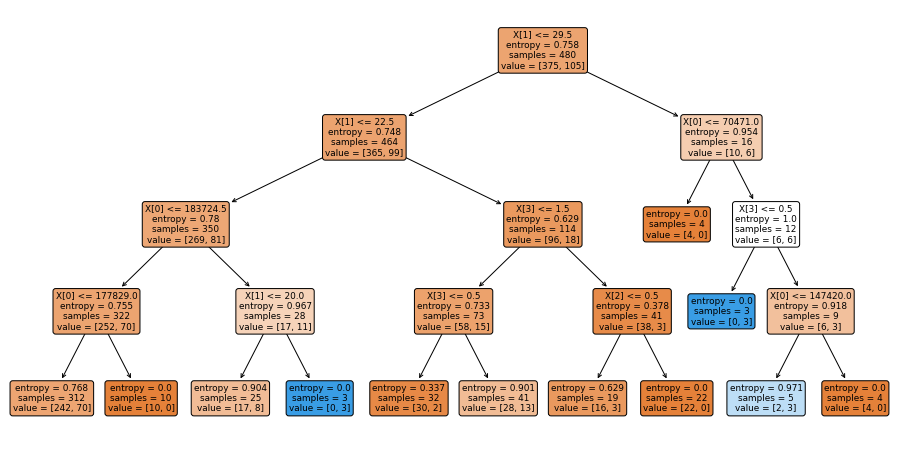

In [56]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(dt_model,filled=True, rounded=True)
plt.show()

### Training Data

In [57]:
y_pred_train = dt_model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Test Data

In [58]:
y_pred_test = dt_model.predict(X_test)

### Model Evaluation

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,roc_auc_score,roc_curve

#### Training Accuracy

In [60]:
accuracy_score(y_train,y_pred_train)

0.7958333333333333

In [61]:
print(confusion_matrix(y_train,y_pred_train))

[[373   2]
 [ 96   9]]


In [62]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       375
           1       0.82      0.09      0.16       105

    accuracy                           0.80       480
   macro avg       0.81      0.54      0.52       480
weighted avg       0.80      0.80      0.72       480



auc accuracy: 0.5401904761904762


Text(0, 0.5, 'True Positive Rate')

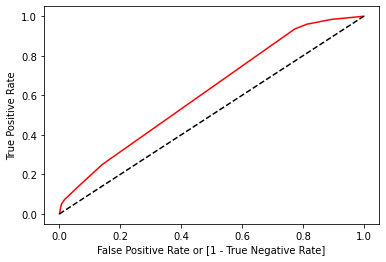

In [63]:
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (x)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print('auc accuracy:',auc)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### Test Accuracy

In [64]:
accuracy_score(y_test,y_pred_test)

0.7916666666666666

In [65]:
print(confusion_matrix(y_test,y_pred_test))

[[95  6]
 [19  0]]


### Model Deployment

In [66]:
from pickle import dump

In [67]:
dump(dt_model,open('fraud_dt_model.pkl','wb'))
from pickle import load
loaded_pkl_file = load(open('fraud_dt_model.pkl','rb'))
predicted_answers = loaded_pkl_file.predict(X_test)
accuracy_score(y_test,predicted_answers)

0.7916666666666666